# Árvore de decisão

Ilustra o funcionamento do algoritmo de árvore de decisão com atributos numéricos

## Base de dados: Iris dataset (espécies de lírios)

https://archive.ics.uci.edu/ml/datasets/iris/

3 Classes (setosa, virginica, versicolor)

50 amostras por Classes

4 atributos reais positivos (comp. pétala, com. sépala, larg. pétala, larg. sépala)

In [8]:
!pip install pydotplus
!pip install dtreeviz

  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24572 sha256=f5d233211340b3ca2bde6bf2318122cbe27b6f9990f05504ef2f716387366ebd
  Stored in directory: c:\users\guilherme\appdata\local\pip\cache\wheels\1e\7b\04\7387cf6cc9e48b4a96e361b0be812f0708b394b821bf8c9c50
Successfully built pydotplus
  Created wheel for dtreeviz: filename=dtreeviz-1.0-py3-none-any.whl size=47222 sha256=1e63586167797102088a085a493cadac9232e79fbeb0014c20b8f26fea2dbb01
  Stored in directory: c:\users\guilherme\appdata\local\pip\cache\wheels\0a\27\39\56e6216f118120c9a3d1c7a5f4ce96f06a98ccd20f691166fe
Successfully built dtreeviz


In [9]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

np.set_printoptions(threshold=None, precision=2)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('precision', 2)

## Carga dos dados e particionamento das bases de treinamento e teste


In [22]:
iris = load_iris()
X, y = iris['data'], iris['target']
class_name = iris['target_names']

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.15, random_state=0)

In [23]:
iris_dataframe = pd.DataFrame(np.c_[iris['data'], iris['target']], columns=np.append(iris['feature_names'], 'target'))
iris_dataframe.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


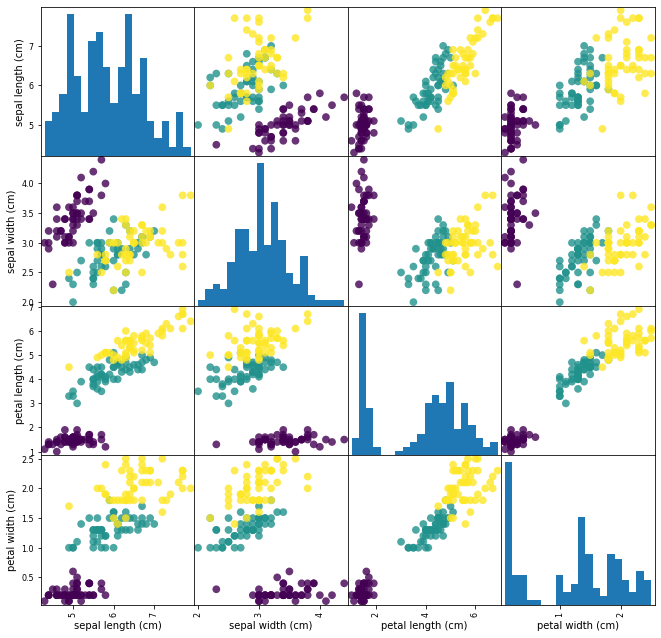

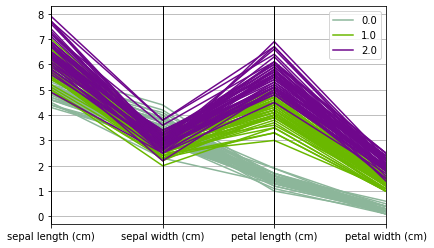

In [24]:
ax2 = pd.plotting.scatter_matrix(iris_dataframe.iloc[:,:4], figsize=(11,11), c=y, marker='o', hist_kwds={'bins': 20}, s=60, alpha=.8)
plt.figure()
ax3 = pd.plotting.parallel_coordinates(iris_dataframe, 'target')
plt.show()

### Indução do modelo

Os três passos para indução de um modelo são:

1. Instanciar o modelo: *DecisionTreeClassifier()*

2. Treinar o modelo *fit()*

3. Testar o modelo *predict()*

In [25]:
tree_iris = DecisionTreeClassifier(random_state=0, criterion='entropy', class_weight={0:1, 1:1})

tree_iris = tree_iris.fit(X_train, y_train)
print('Acurácia {base de treinamento}: ', tree_iris.score(X_train, y_train))

y_pred = tree_iris.predict(X_test)
print('Acurácia de previsão: ', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=iris.target_names))

cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_table = pd.DataFrame(data=cnf_matrix, index=iris.target_names, columns=[x + '(prev)' for x in iris.target_names])
print(cnf_table)

Acurácia {base de treinamento}:  1.0
Acurácia de previsão:  1.0
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         7
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00         5

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23

            setosa(prev)  versicolor(prev)  virginica(prev)
setosa                 7                 0                0
versicolor             0                11                0
virginica              0                 0                5


### Exibição da árvore de decisão

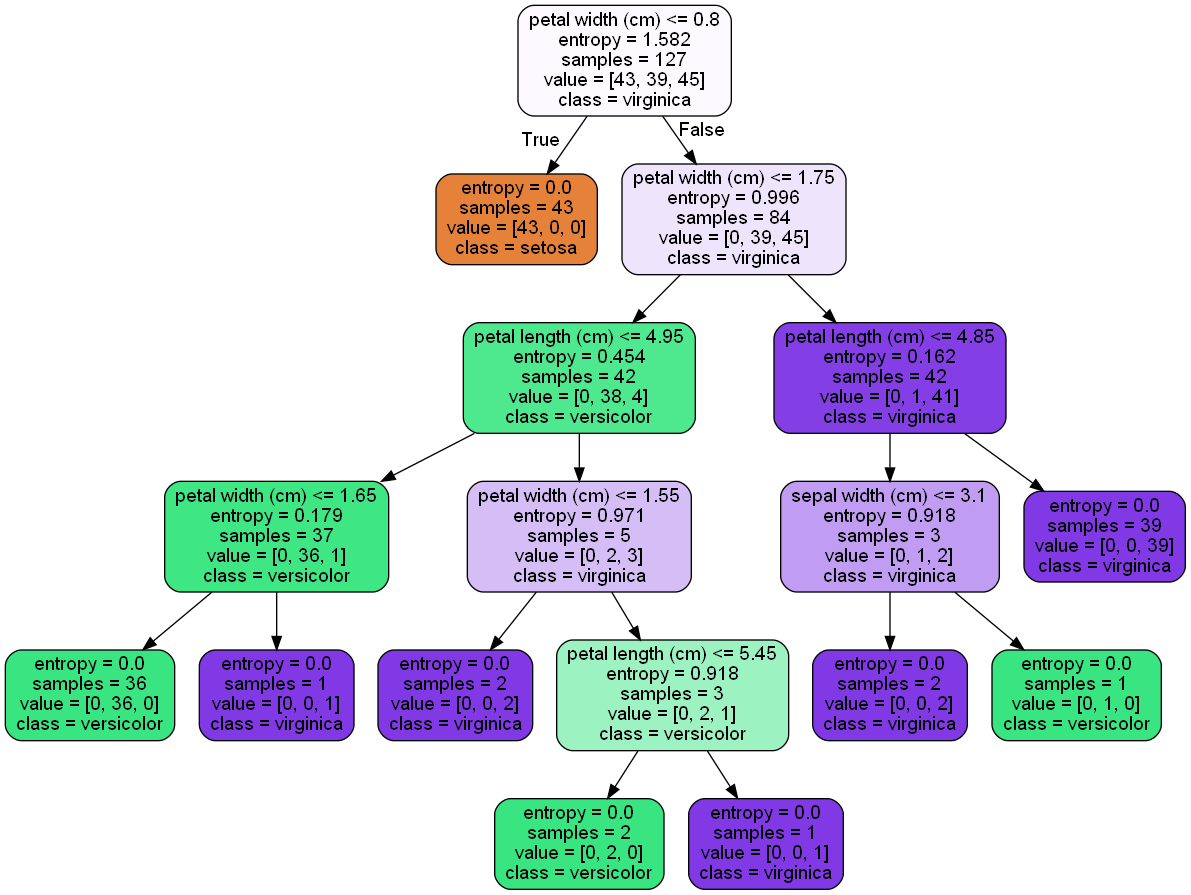

In [26]:
import pydotplus
from IPython.display import Image

dot_data = tree.export_graphviz(tree_iris, out_file=None,
#proportion=True,
rounded=True,
filled=True,
feature_names=iris.feature_names,
class_names=['setosa', 'versicolor', 'virginica'])

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())